<a href="https://colab.research.google.com/github/teabag759/Titanic_MLfromDisaster/blob/main/%08Titanic_MLfromDisaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

- https://www.kaggle.com/c/titanic

## Variable Notes
변수(feature, variable) |	정의 |	설명 |	타입
-----------------------|-----|------|-----------
survival |	생존여부 |	target label | 1, 0 으로 표현됨	| integer
Pclass |	티켓의 클래스 |	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature | 	integer
sex	| 성별 |	male, female 로 구분되며 binary feature |	string
Age	| 나이 |	continuous |	integer
sibSp |	함께 탑승한 형제와 배우자의 수 | quantitative |	integer
parch |	함께 탑승한 부모, 아이의 수	| quantitative | integer
ticket | 티켓 번호 | alphabat + integer |	string
fare |	탑승료 |	continuous |	float
cabin |	객실 번호 |	alphabat + integer |	string
embarked |	탑승 항구 |	C = Cherbourg, Q = Queenstown, S = Southampton | string

# 필요한 라이브러리 설치

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# 미션 1 : 데이터 로드와 피처 엔지니어링

In [ ]:
# 데이터 로드하기

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boost_DSProject/Data/Titanic/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boost_DSProject/Data/Titanic/test.csv")
combine = [train_df, test_df]

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터셋 탐색 : 통계, 분포, 결측치 확인

In [ ]:
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
# 수치형 데이터 확인
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 범주형 데이터 확인
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


1. Cabin, Age 에 결측치 존재
2. Survived 는 0과 1로 이루어진 범주형 데이터
3. 대부분의 승객은 SibSp(형제자매, 배우자)나 Parch(부모, 자식) 없이 탑승
4. 나이가 많은 승객(> 75% : 65 ~ 80세)은 매우 적음
5. Sex에서 male의 수가 약 65%이상 차지(557/891)
6. Ticket은 중복되는 경우가 존재
7. Embarked의 경우 S가 제일 많음

## Pivoting features 분석


In [ ]:
# Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Sex
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# SibSp
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- upper class의 경우 생존율이 높음
- female의 경우 생존율이 높음
- SibSp, Parch의 경우 생존율과의 상관성을 찾기 어려움

## 데이터 시각화


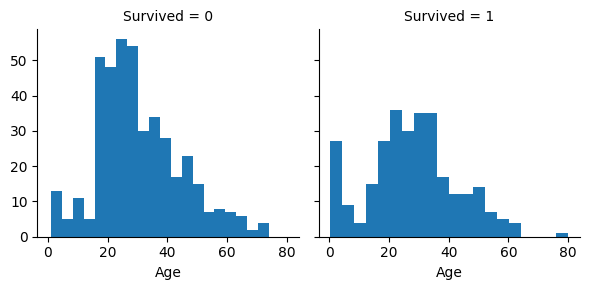

In [ ]:
# Age
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 4세 미만의 아동일 경우 생존율이 높음
- 대부분의 승객의 경우 16~32세 사이임
- 16~32세 사이의 승객들은 생존하지 못한 경우가 많음

**Decisions**
1. Age는 필요한 feature이므로 null 값을 채워야 함
2. 나이 범위에 따라 그룹화하는 것이 분석이 좋을 듯

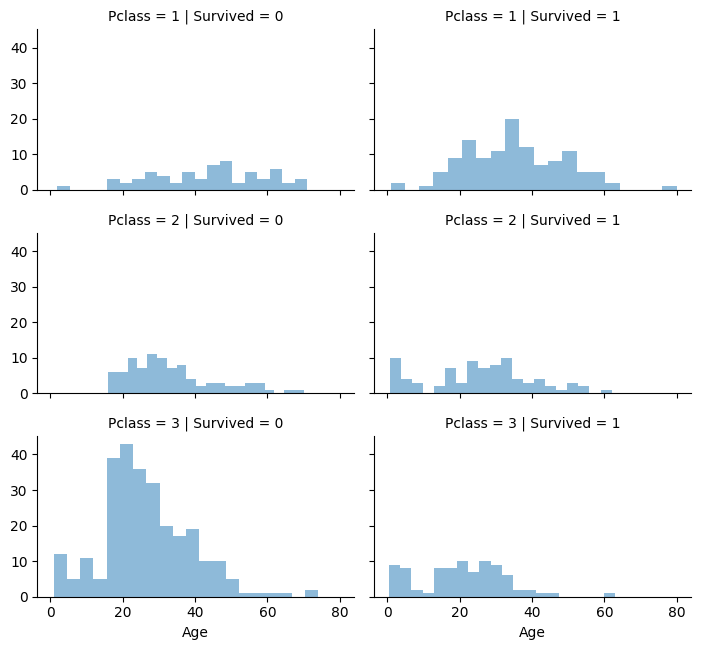

In [ ]:
# Pclass and Age
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- class 1의 생존율이 높음
- class 2, 3 에서 영아(age < 4)승객은 대부분 생존

**Decisions**
1. Pclass는 모델에 필요

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


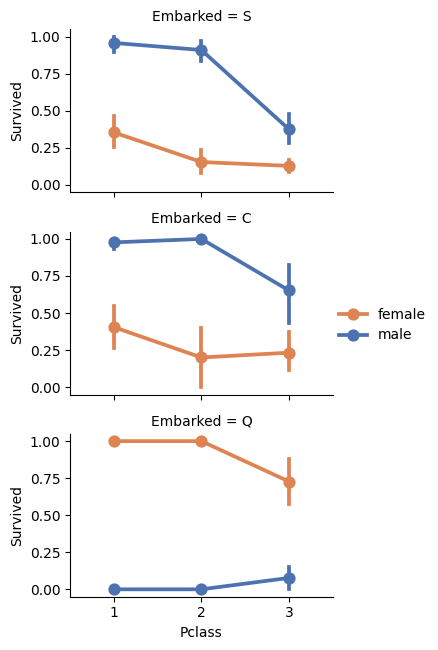

In [ ]:
# 각 탑승구역 생존자 확인(성별 간)
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

- 대체로 여성의 생존율이 높음
- Embarked=C 의 경우 남성의 생존율이 높음(예외)

**Decisions**
1. Sex는 반드시 필요한 특성
2. Embarked 역시 모델에 있어 필요한 특성, 결측치를 채워야 함

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

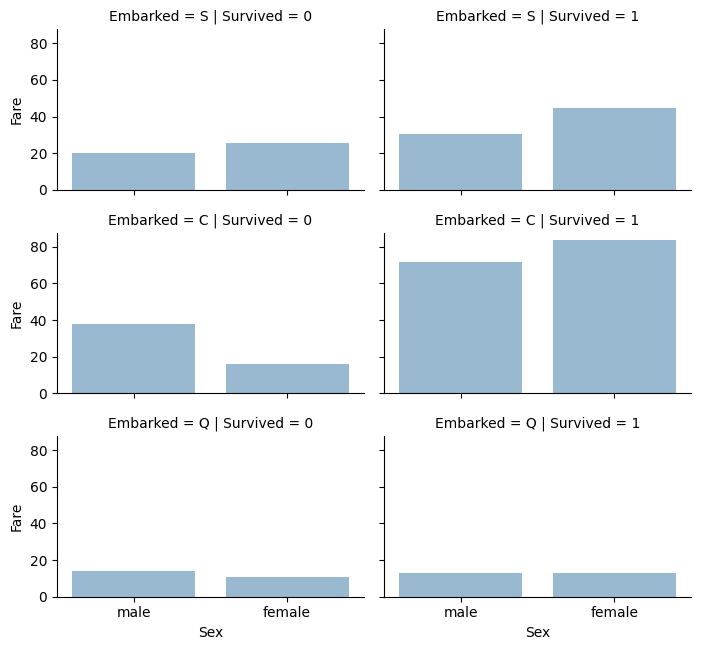

In [ ]:
# Embarked, Sex, Fare와 Survived의 특성
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

- 높은 금액을 낸 경우 생존율이 높음

**Decisions**
1. Fare 역시 확인해봐야 하는 특성

## feature 제거 / 생성 / 변환

- Cabin, Ticket 의 경우 중복이 많고 생존율과 관련이 없다고 생각되므로 제거
- Name 또한 생존율과 관련이 없다고 생각되므로 제거
- 범주형 특성을 수치형으로 변환하기 (Sex, Embarked)
- 수치형, 연속형 특성 채우기 (Age, Fare)
- 기존의 특성을 합쳐 새로운 특성 만들기(Parch, SibSp -> FamilySize)
- 범주형 특성 채우기(Embarked)

In [ ]:
# Cabin, Ticket, Name 삭제
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 9), (418, 8), (891, 9), (418, 8))

In [ ]:
# 범주형 특성 -> 수치형
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


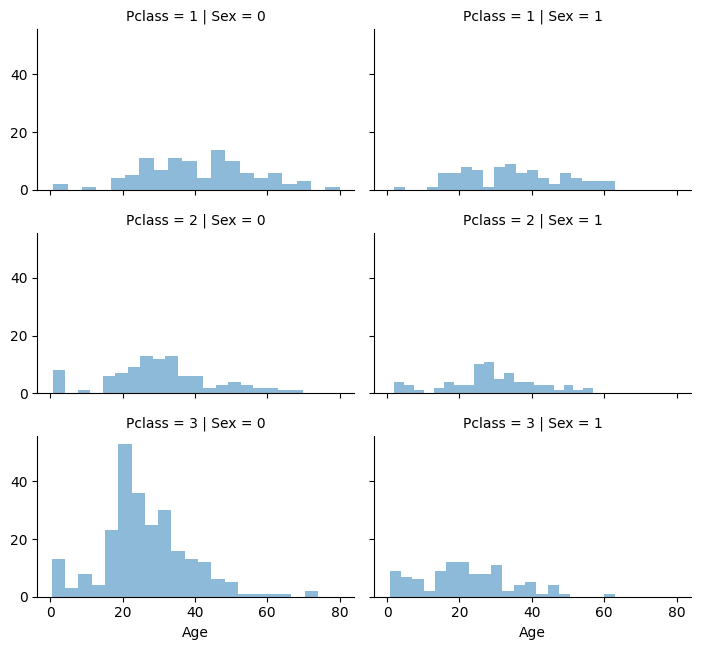

In [ ]:
# 수치형 연속형 특성 채우기
# 결측치 구간 확인
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
# 2차원 배열 생성
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# 각 클래스와 성별에 따른 나이의 중앙값으로 결측치를 채우기
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median() # 중앙값 사용

            # 실수로 표현된 나이는 가장 가까운 0.5 값으로 표현
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

    # 결측치 채우기
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,S
1,2,1,1,1,38,1,0,71.2833,C
2,3,1,3,1,26,0,0,7.9250,S
3,4,1,1,1,35,1,0,53.1000,S
4,5,0,3,0,35,0,0,8.0500,S


In [ ]:
# 연령대 별로 생존율과 연결
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
# AgeBand -> Age를 범주형으로 변환
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [ ]:
# AgeBand 삭제
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,7.2500,S
1,2,1,1,1,2,1,0,71.2833,C
2,3,1,3,1,1,0,0,7.9250,S
3,4,1,1,1,2,1,0,53.1000,S
4,5,0,3,0,2,0,0,8.0500,S


In [ ]:
# FamilySize 특성 생성하기
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# 범주형 특성 채우기
# 최빈값 구하기
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
# 최빈값으로 결측치 채우기
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
# 범주형 특성 -> 수치형 (One-hot encoding)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,1,1,0,7.2500,0,2
1,2,1,1,1,2,1,0,71.2833,1,2
2,3,1,3,1,1,0,0,7.9250,0,1
3,4,1,1,1,2,1,0,53.1000,0,2
4,5,0,3,0,2,0,0,8.0500,0,1


In [ ]:
# 중앙값으로 결측치 채우기
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,2,1,0,7.0000,0,2
2,894,2,0,3,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


In [ ]:
# FareBand 생성 -> 범주형 데이터
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_df, test_df]

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FareBand
0,1,0,3,0,1,1,0,0,0,2,"(-0.001, 7.91]"
1,2,1,1,1,2,1,0,3,1,2,"(31.0, 512.329]"
2,3,1,3,1,1,0,0,1,0,1,"(7.91, 14.454]"
3,4,1,1,1,2,1,0,3,0,2,"(31.0, 512.329]"
4,5,0,3,0,2,0,0,1,0,1,"(7.91, 14.454]"
5,6,0,3,0,1,0,0,1,2,1,"(7.91, 14.454]"
6,7,0,1,0,3,0,0,3,0,1,"(31.0, 512.329]"
7,8,0,3,0,0,3,1,2,0,5,"(14.454, 31.0]"
8,9,1,3,1,1,0,2,1,0,3,"(7.91, 14.454]"
9,10,1,2,1,0,1,0,2,1,2,"(14.454, 31.0]"


In [ ]:
# FareBand 삭제
train_df = train_df.drop(['FareBand', 'PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,1,1,0,0,0,2
1,1,1,1,2,1,0,3,1,2
2,1,3,1,1,0,0,1,0,1
3,1,1,1,2,1,0,3,0,2
4,0,3,0,2,0,0,1,0,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,0,2,0,0,0,2,1
1,893,3,1,2,1,0,0,0,2
2,894,2,0,3,0,0,1,2,1
3,895,3,0,1,0,0,1,0,1
4,896,3,1,1,1,1,1,0,3


# 미션 2 & 3 & 5 : 모델 선택, 훈련 및 정확도
- Logistic Regression
- Support Vector Machines
- Decision Tree
- Random Forest

In [ ]:
# train, test 데이터셋 나누기
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

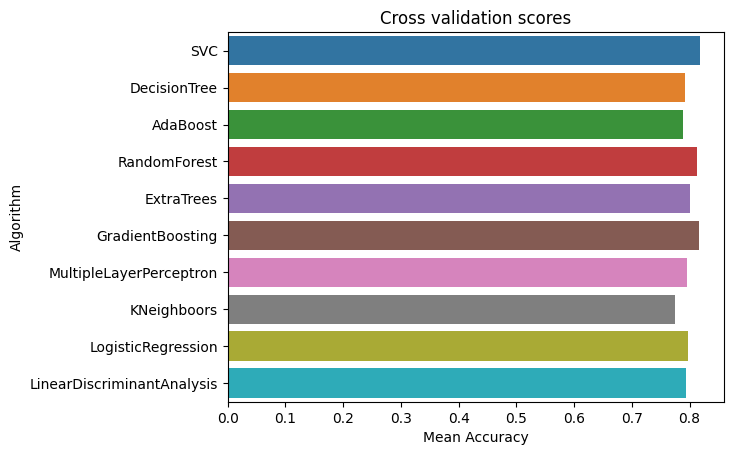

In [ ]:
# Modeling step Test differents algorithms
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees",
                 "GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression",
                 "LinearDiscriminantAnalysis"]})

g = sns.barplot(x="CrossValMeans", y="Algorithm", hue="Algorithm", data=cv_res, orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.25

In [ ]:
# 상관계수 확인
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.587928
5,Fare,0.305422
6,Embarked,0.242315
4,Parch,0.048506
7,FamilySize,-0.190829
3,SibSp,-0.239079
2,Age,-0.660338
0,Pclass,-0.981835


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.55

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.55

- Random Forest와 Decision Tree의 정확도가 가장 높은 것으로 나타남

# 미션 4 & 5 : 하이퍼파라미터 튜닝 및 모델 평가

- xgboost 사용

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

# GridSearchCV 사용
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 50, 100],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [ ]:
# best parameter 출력
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
Y_pred = grid_search.predict(X_test)
acc_grid_search = round(grid_search.score(X_train, Y_train) * 100, 2)
acc_grid_search

85.07